# Comparing pathway definitions with an example network

This notebook performs the analysis of the example network presented in our paper:

O. Øyås, A. Theorell, and J. Stelling. "Scalable enumeration and sampling of minimal metabolic pathways for organims and communities". *bioRxiv* (2024).

In [2]:
import cobra
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns

from matplotlib import rcParams
from matplotlib.patches import Polygon
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from os.path import join
from scipy.stats import linregress
from scipy.spatial import ConvexHull

from mptool import *

%matplotlib inline
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Arial'
rcParams['mathtext.it'] = 'Arial:italic'
rcParams['mathtext.bf'] = 'Arial:bold'

results_dir = 'results'

In [3]:
# Create toy model
model = cobra.Model('toy')

# Reaction strings
strings = [
    '--> A',
    'B -->',
    'C -->',
    'A --> B',
    'B --> C',
    'A <=> C'
]

# Flux bounds
bound = 10
ub = [bound] * len(strings)
lb = [0] * len(strings)
lb[2] = ub[2] = 1
lb[5] = -bound

# Add reactions to model
model.add_reactions([cobra.Reaction('r' + str(i)) for i in range(1, 7)])
for i, r in enumerate(model.reactions):
    r.build_reaction_from_string(strings[i])
    r.bounds = lb[i], ub[i]

# Add compartments to model
model.compartments = {'c': 'cytoplasm'}
for m in model.metabolites:
    m.compartment = 'c'

# Print reactions
for r in model.reactions:
    print(r)
    
# Export model
cobra.io.save_matlab_model(model, 'models/toy.mat')
    
model

Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-27
unknown metabolite 'A' created
unknown metabolite 'B' created
unknown metabolite 'C' created
r1:  --> A
r2: B --> 
r3: C --> 
r4: A --> B
r5: B --> C
r6: A <=> C


<Model toy at 0x33b882f60>

In [4]:
df = cobra.sampling.sample(model, 1000, method='achr')
df

Read LP format model from file /var/folders/0z/0wtrv7xn7yq6df17wtbwn69c0000gn/T/tmpp6w2vqt3.lp
Reading time = 0.00 seconds
: 3 rows, 12 columns, 18 nonzeros


r1        r2   r3        r4        r5        r6
0    3.051431  2.051431  1.0  9.353697  7.302267 -6.302267
1    4.377364  3.377364  1.0  5.956031  2.578667 -1.578667
2    6.248544  5.248544  1.0  9.887689  4.639145 -3.639145
3    2.672272  1.672272  1.0  5.959028  4.286756 -3.286756
4    1.230783  0.230783  1.0  2.923114  2.692331 -1.692331
..        ...       ...  ...       ...       ...       ...
995  9.028671  8.028671  1.0  8.962541  0.933870  0.066130
996  7.327075  6.327075  1.0  7.476779  1.149704 -0.149704
997  6.817356  5.817356  1.0  5.878329  0.060974  0.939026
998  1.032782  0.032782  1.0  3.298002  3.265220 -2.265220
999  3.978838  2.978838  1.0  7.444433  4.465595 -3.465595

[1000 rows x 6 columns]

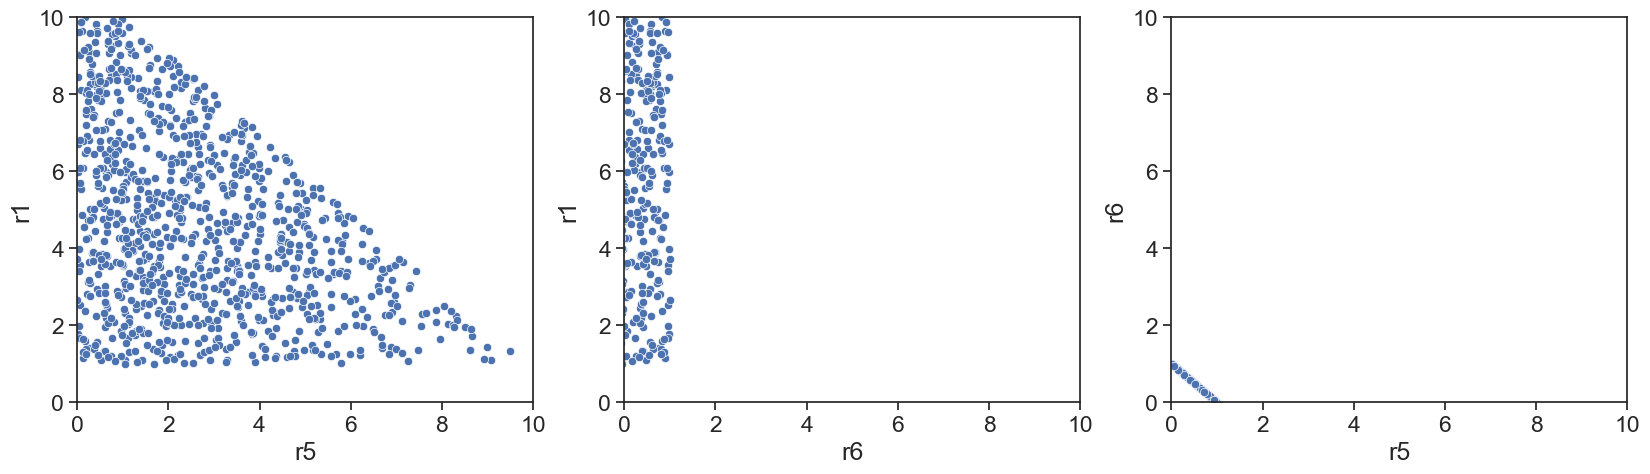

In [5]:
sns.set(style='ticks', font_scale=1.5)
f = plt.figure()

plt.subplot(1, 3, 1)
sns.scatterplot(x=df.r5, y=df.r1)
plt.xlim(0, 10)
plt.ylim(0, 10)

plt.subplot(1, 3, 2)
sns.scatterplot(x=df.r6, y=df.r1)
plt.xlim(0, 10)
plt.ylim(0, 10)

plt.subplot(1, 3, 3)
sns.scatterplot(x=df.r5, y=df.r6)
plt.xlim(0, 10)
plt.ylim(0, 10)

f.set_size_inches(20, 5)

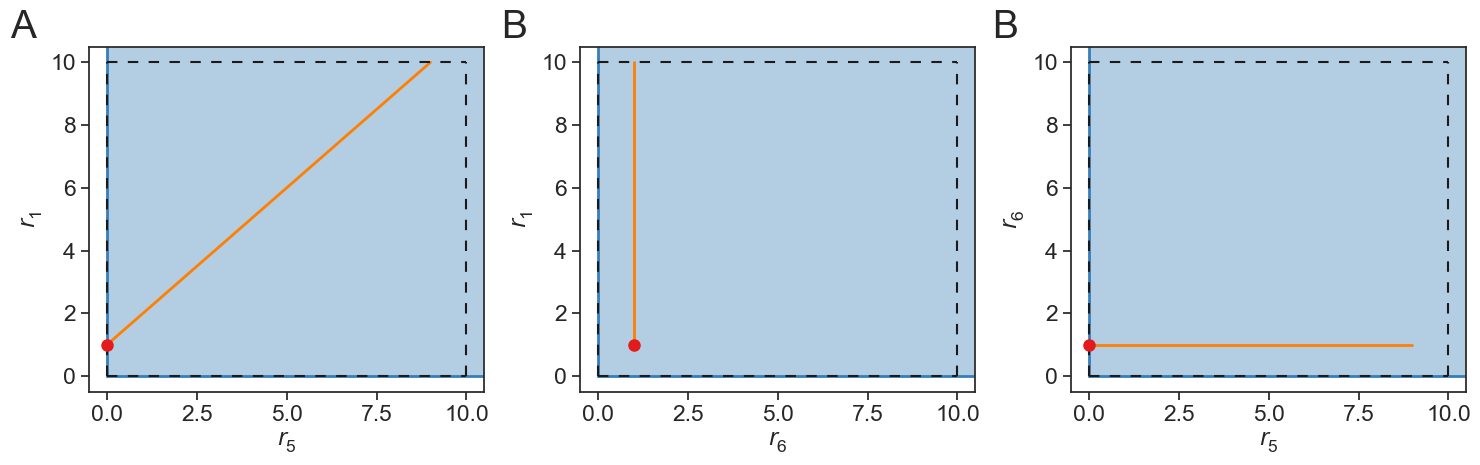

In [6]:
sns.set(style='ticks', font_scale=1.5)
f = plt.figure()

label_x = -0.2
label_y = 1.025
label_size = 28

ls = (0, (5, 5))

ax = plt.subplot(1, 3, 1)

# Plot EFM projection
p = Polygon([(0, 0), (100, 0), (100, 100), (0, 100)], fc='#b3cde3', ec='#377eb8', lw=2, alpha=1)
ax.add_patch(p)

# Plot EFV projection
ax.plot([0, 9], [1, 10], c='#ff7f00', lw=2)

# Plot MP projection
ax.scatter([0], [1], c='#e41a1c', s=64, zorder=10)

# Plot bounds
ax.plot([0, 10], [0, 0], c='k', ls=ls)
ax.plot([0, 10], [10, 10], c='k', ls=ls)
ax.plot([0, 0], [0, 10], c='k', ls=ls)
ax.plot([10, 10], [0, 10], c='k', ls=ls)

plt.xlim(-0.5, 10.5)
plt.ylim(-0.5, 10.5)
plt.xlabel('$r_5$')
plt.ylabel('$r_1$')
ax.text(label_x, label_y, 'A', transform=ax.transAxes, size=label_size)


ax = plt.subplot(1, 3, 2)

# Plot EFM projection
p = Polygon([(0, 0), (100, 0), (100, 100), (0, 100)], fc='#b3cde3', ec='#377eb8', lw=2, alpha=1)
ax.add_patch(p)

# Plot EFV projection
ax.plot([1, 1], [1, 10], c='#ff7f00', lw=2)

# Plot MP projection
ax.scatter([1], [1], c='#e41a1c', s=64, zorder=10)

# Plot bounds
ax.plot([0, 10], [0, 0], c='k', ls=ls)
ax.plot([0, 10], [10, 10], c='k', ls=ls)
ax.plot([0, 0], [0, 10], c='k', ls=ls)
ax.plot([10, 10], [0, 10], c='k', ls=ls)

plt.xlim(-0.5, 10.5)
plt.ylim(-0.5, 10.5)
plt.xlabel('$r_6$')
plt.ylabel('$r_1$')
ax.text(label_x, label_y, 'B', transform=ax.transAxes, size=label_size)


ax = plt.subplot(1, 3, 3)

# Plot EFM projection
p = Polygon([(0, 0), (100, 0), (100, 100), (0, 100)], fc='#b3cde3', ec='#377eb8', lw=2, alpha=1)
ax.add_patch(p)

# Plot EFV projection
ax.plot([0, 9], [1, 1], c='#ff7f00', lw=2)

# Plot MP projection
ax.scatter([0], [1], c='#e41a1c', s=64, zorder=10)

# Plot bounds
ax.plot([0, 10], [0, 0], c='k', ls=ls)
ax.plot([0, 10], [10, 10], c='k', ls=ls)
ax.plot([0, 0], [0, 10], c='k', ls=ls)
ax.plot([10, 10], [0, 10], c='k', ls=ls)

plt.xlim(-0.5, 10.5)
plt.ylim(-0.5, 10.5)
plt.xlabel('$r_5$')
plt.ylabel('$r_6$')
ax.text(label_x, label_y, 'B', transform=ax.transAxes, size=label_size)


f.set_size_inches(15, 5)
plt.tight_layout()

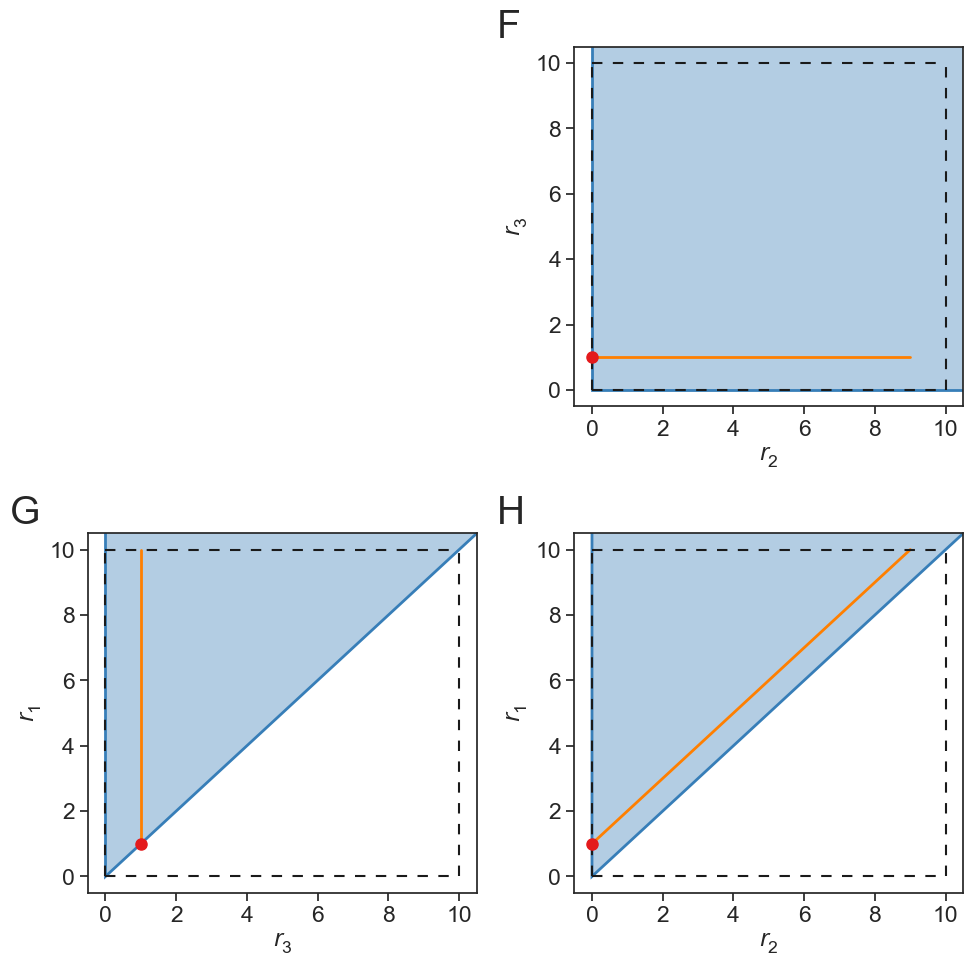

In [8]:
sns.set(style='ticks', font_scale=1.5)
f = plt.figure()

label_x = -0.2
label_y = 1.025
label_size = 28

ls = (0, (5, 5))

ax = plt.subplot(2, 2, 2)

# Plot EFM projection
p = Polygon([(0, 0), (100, 0), (100, 100), (0, 100)], fc='#b3cde3', ec='#377eb8', lw=2, alpha=1)
ax.add_patch(p)

# Plot EFV projection
ax.plot([0, 9], [1, 1], c='#ff7f00', lw=2)

# Plot MP projection
ax.scatter([0], [1], c='#e41a1c', s=64, zorder=10)

# Plot bounds
ax.plot([0, 10], [0, 0], c='k', ls=ls)
ax.plot([0, 10], [10, 10], c='k', ls=ls)
ax.plot([0, 0], [0, 10], c='k', ls=ls)
ax.plot([10, 10], [0, 10], c='k', ls=ls)

ax.set_xticks(range(0, 11, 2))
plt.xlim(-0.5, 10.5)
plt.ylim(-0.5, 10.5)
plt.xlabel('$r_2$')
plt.ylabel('$r_3$')
ax.text(label_x, label_y, 'F', transform=ax.transAxes, size=label_size)


ax = plt.subplot(2, 2, 3)

# Plot EFM projection
p = Polygon([(0, 0), (100, 100), (0, 100)], fc='#b3cde3', ec='#377eb8', lw=2, alpha=1)
ax.add_patch(p)

# Plot EFV projection
ax.plot([1, 1], [1, 10], c='#ff7f00', lw=2)

# Plot MP projection
ax.scatter([1], [1], c='#e41a1c', s=64, zorder=10)

# Plot bounds
ax.plot([0, 10], [0, 0], c='k', ls=ls)
ax.plot([0, 10], [10, 10], c='k', ls=ls)
ax.plot([0, 0], [0, 10], c='k', ls=ls)
ax.plot([10, 10], [0, 10], c='k', ls=ls)

ax.set_xticks(range(0, 11, 2))
plt.xlim(-0.5, 10.5)
plt.ylim(-0.5, 10.5)
plt.xlabel('$r_3$')
plt.ylabel('$r_1$')
ax.text(label_x, label_y, 'G', transform=ax.transAxes, size=label_size)


ax = plt.subplot(2, 2, 4)

# Plot EFM projection
p = Polygon([(0, 0), (100, 100), (0, 100)], fc='#b3cde3', ec='#377eb8', lw=2, alpha=1)
ax.add_patch(p)

# Plot EFV projection
ax.plot([0, 9], [1, 10], c='#ff7f00', lw=2)

# Plot MP projection
ax.scatter([0], [1], c='#e41a1c', s=64, zorder=10)

# Plot bounds
ax.plot([0, 10], [0, 0], c='k', ls=ls)
ax.plot([0, 10], [10, 10], c='k', ls=ls)
ax.plot([0, 0], [0, 10], c='k', ls=ls)
ax.plot([10, 10], [0, 10], c='k', ls=ls)

ax.set_xticks(range(0, 11, 2))
plt.xlim(-0.5, 10.5)
plt.ylim(-0.5, 10.5)
plt.xlabel('$r_2$')
plt.ylabel('$r_1$')
ax.text(label_x, label_y, 'H', transform=ax.transAxes, size=label_size)


f.set_size_inches(10, 10)
plt.tight_layout()
f.savefig(join(results_dir, 'solution_space_2d_external.svg'), bbox_inches='tight')

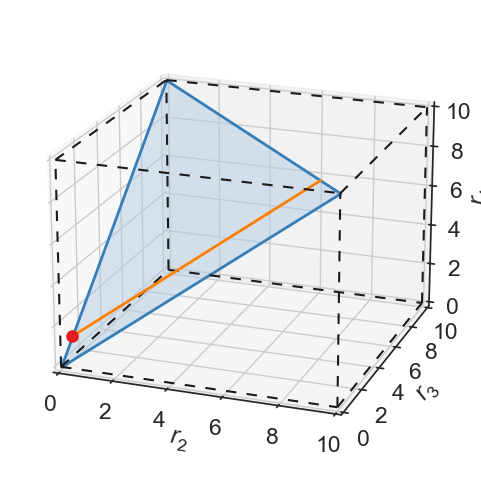

In [9]:
sns.set(style='ticks', font_scale=1.5)
f = plt.figure()
ax = f.add_subplot(projection='3d', computed_zorder=False)

label_x = -0.2
label_y = 1.025
label_z = 85
label_size = 28

# # Plot EFM cone
# y = [0, 10, 10]
# x = [0, 10, 0]
# z = [0, 0, 10]
# v = np.array(list(zip(x, y, z)))
# hull = ConvexHull(v)

# for i, s in enumerate(hull.simplices):
#     p = Poly3DCollection([v[s]], alpha=0.5, edgecolors='#377eb8', linewidths=0, facecolors='#b3cde3', zorder=2)
#     ax.add_collection3d(p)
# for i, (x, y, z) in enumerate(v):
#     ax.text(x - 0.3, y, z, '({}, {}, {})'.format(x, y, z, 0), ha='left', fontsize=14)

# ax.plot([0, 10], [10, 10], [0, 0], zdir='x', c='#377eb8')
# ax.plot([0, 0], [0, 10], [0, 0], zdir='x', c='#377eb8')
# ax.plot([0, 10], [10, 10], [10, 10], zdir='y', c='#377eb8')
# ax.plot([0, 0], [0, 10], [10, 10], zdir='y', c='#377eb8')
# ax.plot([10, 10], [0, 10], [10, 10], zdir='y', c='#377eb8')
# ax.plot([10, 10], [0, 10], [10, 10], c='#377eb8')
# ax.plot([10, 10], [0, 10], zdir='y', c='#377eb8')
# ax.plot([0, 10], [10, 10], zdir='y', c='#377eb8')
# ax.plot([0, 10], [0, 0], zdir='z', c='#377eb8')
# ax.plot([0, 10], [10, 10], zdir='z', c='#377eb8')
# ax.plot([0, 0], [0, 10], zdir='z', c='#377eb8')
# ax.plot([10, 10], [0, 10], zdir='z', c='#377eb8')


# Plot EFM plane
x = [0, 10, 0]
y = [0, 0, 10]
z = [0, 10, 10]
v = list(zip(x, y, z))
p = Poly3DCollection([v], alpha=0.5, edgecolors='#377eb8', linewidths=2, facecolors='#b3cde3', zorder=2)
ax.add_collection3d(p)

# Plot EFV line
ax.plot3D([0, 9], [1, 1], [1, 10], c='#ff7f00', lw=2, zorder=3)

# # Plot MP point
# y, x, z = [0, 1], [1, 0], [0, 1]
# ax.plot3D(x, y, z, lw=8, c='#e41a1c', zorder=10)
ax.scatter3D([0], [1], [1], c='#e41a1c', s=64, alpha=1, zorder=3)
# # ax.text(1 - 0.3, 0, 1, '({}, {}, {})'.format(1, 0, 1, 0), ha='left', fontsize=14)

ax.text(label_x, label_y, label_z, 'E', transform=ax.transAxes, size=label_size)

# Plot bounds
ax.plot([0, 10], [10, 10], [0, 0], zdir='x', c='k', ls=ls, zorder=2)
ax.plot([0, 0], [0, 10], [0, 0], zdir='x', c='k', ls=ls, zorder=2)
ax.plot([0, 10], [10, 10], [10, 10], zdir='y', c='k', ls=ls, zorder=2)
ax.plot([0, 0], [0, 10], [10, 10], zdir='y', c='k', ls=ls, zorder=2)
ax.plot([10, 10], [0, 10], [10, 10], zdir='y', c='k', ls=ls, zorder=2)
ax.plot([10, 10], [0, 10], [10, 10], c='k', ls=ls, zorder=2)
ax.plot([10, 10], [0, 10], zdir='y', c='k', ls=ls, zorder=2)
ax.plot([0, 10], [10, 10], zdir='y', c='k', ls=ls, zorder=3)
ax.plot([0, 10], [0, 0], zdir='z', c='k', ls=ls, zorder=2)
ax.plot([0, 10], [10, 10], zdir='z', c='k', ls=ls, zorder=2)
ax.plot([0, 0], [0, 10], zdir='z', c='k', ls=ls, zorder=2)
ax.plot([10, 10], [0, 10], zdir='z', c='k', ls=ls, zorder=2)

# ax.set_xticks(range(-10, 11, 5))
ax.set_xlabel('$r_2$')
ax.set_ylabel('$r_3$')
ax.set_zlabel('$r_1$')
ax.set_ylim(0, 10)
ax.set_xlim(0, 10)
ax.set_zlim(0, 10)
ax.view_init(20, -70)

f.set_size_inches(6, 6)
f.savefig(join(results_dir, 'solution_space_3d_external.svg'), bbox_inches='tight')

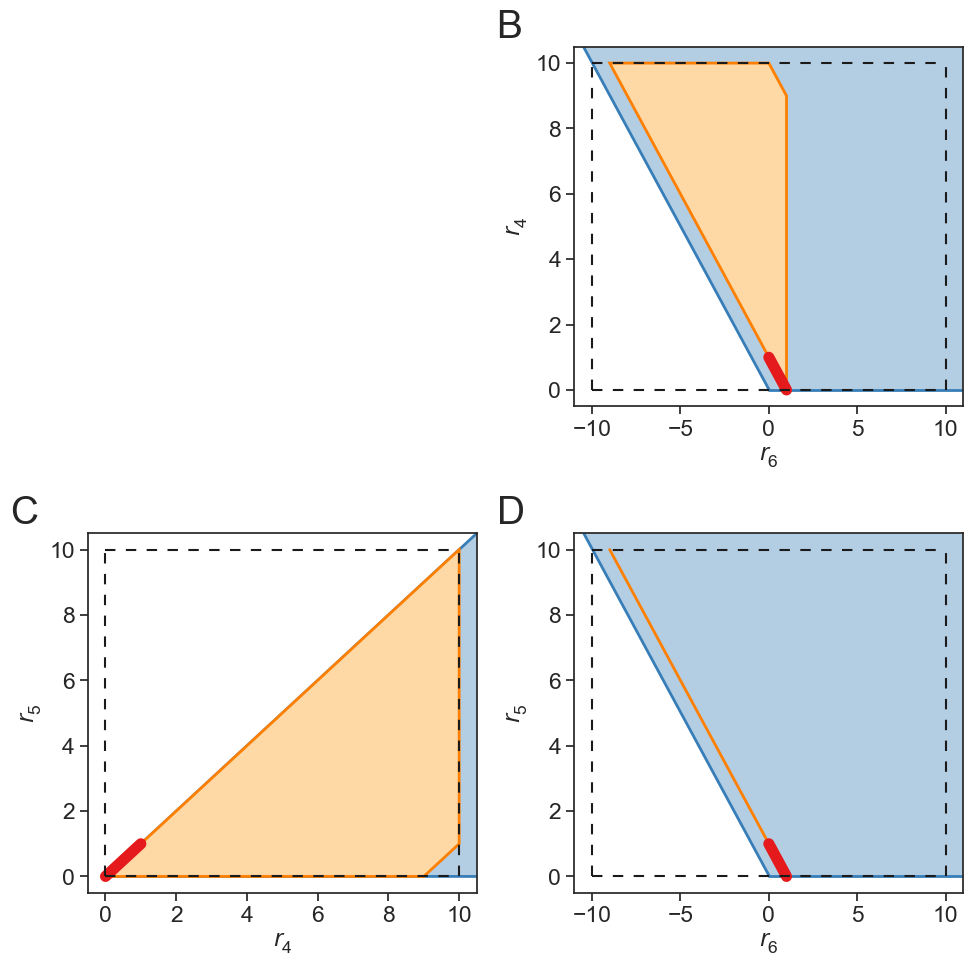

In [10]:
sns.set(style='ticks', font_scale=1.5)
f = plt.figure()

label_x = -0.2
label_y = 1.025
label_size = 28

ls = (0, (5, 5))

ax = plt.subplot(2, 2, 2)

# Plot EFM projection
p = Polygon([(0, 0), (100, 0), (100, 100), (-100, 100)], fc='#b3cde3', ec='#377eb8', lw=2, alpha=1)
ax.add_patch(p)

# Plot EFV projection
p = Polygon([(1, 0), (1, 9), (0, 10), (-9, 10)], fc='#fed9a6', ec='#ff7f00', lw=2, alpha=1)
ax.add_patch(p)

# Plot MP projection
ax.plot([0, 1], [1, 0], c='#e41a1c', lw=8)

# Plot bounds
ax.plot([-10, 10], [0, 0], c='k', ls=ls)
ax.plot([-10, 10], [10, 10], c='k', ls=ls)
ax.plot([-10, -10], [0, 10], c='k', ls=ls)
ax.plot([10, 10], [0, 10], c='k', ls=ls)

plt.xlim(-11, 11)
plt.ylim(-0.5, 10.5)
plt.xlabel('$r_6$')
plt.ylabel('$r_4$')
ax.text(label_x, label_y, 'B', transform=ax.transAxes, size=label_size)


ax = plt.subplot(2, 2, 3)

# Plot EFM projection
p = Polygon([(0, 0), (100, 100), (100, 0)], fc='#b3cde3', ec='#377eb8', lw=2, alpha=1)
ax.add_patch(p)

# Plot EFV projection
p = Polygon([(0, 0), (10, 10), (10, 1), (9, 0)], fc='#fed9a6', ec='#ff7f00', lw=2, alpha=1)
ax.add_patch(p)

# Plot MP projection
ax.plot([0, 1], [0, 1], c='#e41a1c', lw=8)

# Plot bounds
ax.plot([0, 10], [0, 0], c='k', ls=ls)
ax.plot([0, 10], [10, 10], c='k', ls=ls)
ax.plot([0, 0], [0, 10], c='k', ls=ls)
ax.plot([10, 10], [0, 10], c='k', ls=ls)

plt.ylim(-0.5, 10.5)
plt.xlim(-0.5, 10.5)
plt.xticks(range(0, 11, 2))
plt.ylabel('$r_5$')
plt.xlabel('$r_4$')
ax.text(label_x, label_y, 'C', transform=ax.transAxes, size=label_size)


ax = plt.subplot(2, 2, 4)

# Plot EFM projection
p = Polygon([(0, 0), (100, 0), (100, 100), (-100, 100)], fc='#b3cde3', ec='#377eb8', lw=2, alpha=1)
ax.add_patch(p)

# Plot EFV projection
ax.plot([-9, 1], [10, 0], c='#ff7f00', lw=2)

# Plot MP projection
ax.plot([0, 1], [1, 0], c='#e41a1c', lw=8)

# Plot bounds
ax.plot([-10, 10], [0, 0], c='k', ls=ls)
ax.plot([-10, 10], [10, 10], c='k', ls=ls)
ax.plot([-10, -10], [0, 10], c='k', ls=ls)
ax.plot([10, 10], [0, 10], c='k', ls=ls)

plt.xlim(-11, 11)
plt.ylim(-0.5, 10.5)
plt.xlabel('$r_6$')
plt.ylabel('$r_5$')
ax.text(label_x, label_y, 'D', transform=ax.transAxes, size=label_size)


f.set_size_inches(10, 10)
plt.tight_layout()
f.savefig(join(results_dir, 'solution_space_2d_internal.svg'), bbox_inches='tight')

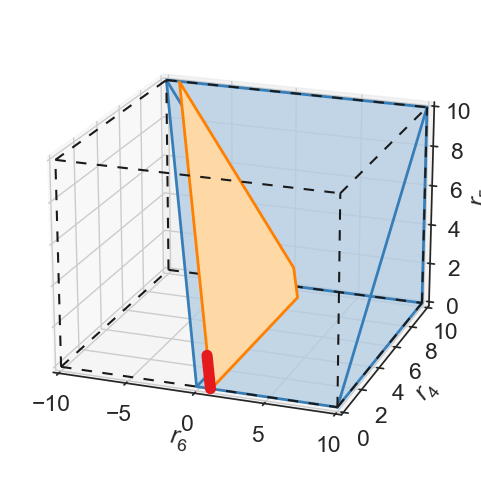

In [11]:
sns.set(style='ticks', font_scale=1.5)
f = plt.figure()
ax = f.add_subplot(projection='3d', computed_zorder=False)

label_x = -0.2
label_y = 1.025
label_z = 85
label_size = 28

# Plot EFM cone
y = [0, 10, 10, 0, 10, 10, 10]
x = [0, 0, -10, 10, 0, 10, 10]
z = [0, 0, 10, 0, 10, 10, 0]
v = np.array(list(zip(x, y, z)))
hull = ConvexHull(v)

for i, s in enumerate(hull.simplices):
    p = Poly3DCollection([v[s]], alpha=0.5, edgecolors='#377eb8', linewidths=0, facecolors='#b3cde3', zorder=2)
    ax.add_collection3d(p)
# for i, (x, y, z) in enumerate(v):
#     ax.text(x - 0.3, y, z, '({}, {}, {})'.format(x, y, z, 0), ha='left', fontsize=14)

ax.plot3D([0, -10], [0, 10], [0, 10], lw=2, c='#377eb8')
ax.plot3D([0, 10], [0, 0], [0, 0], lw=2, c='#377eb8')
ax.plot3D([10, 10], [0, 10], [0, 0], lw=2, c='#377eb8')
ax.plot3D([0, 10], [10, 10], [0, 0], lw=2, c='#377eb8')
ax.plot3D([-10, 10], [10, 10], [10, 10], lw=2, c='#377eb8')
ax.plot3D([10, 10], [0, 10], [0, 10], lw=2, c='#377eb8')
ax.plot3D([10, 10], [10, 10], [0, 10], lw=2, c='#377eb8')
ax.plot3D([0, -10], [10, 10], [0, 10], lw=2, c='#377eb8')
ax.plot3D([0, -0], [0, 10], [0, 0], lw=2, c='#377eb8')


# Plot EFV plane
y = [0, 9, 10, 10]
x = [1, 1, 0, -9]
z = [0, 0, 1, 10]
v = list(zip(x, y, z))
p = Poly3DCollection([v], alpha=1, edgecolors='#ff7f00', linewidths=2, facecolors='#fed9a6', zorder=3)
ax.add_collection3d(p)
# ax.scatter3D(x, y, z, color='k', facecolor='none', s=100, alpha=1, zorder=1)
# for i, (x, y, z) in enumerate(v):
#     ax.text(x + 0.3, y, z, '({}, {}, {})'.format(x, y, z, 0), ha='left', fontsize=14, color='#ff7f00')

# Plot MP line
y, x, z = [0, 1], [1, 0], [0, 1]
ax.plot3D(x, y, z, lw=8, c='#e41a1c', zorder=10)
# ax.scatter3D(x, y, z, color='k', facecolor='none', s=100, alpha=1, zorder=1)
# ax.text(1 - 0.3, 0, 1, '({}, {}, {})'.format(1, 0, 1, 0), ha='left', fontsize=14)

# ax.text(label_x, label_y, label_z, 'G', transform=ax.transAxes, size=label_size)

# Plot bounds
ax.plot([0, 10], [10, 10], [-10, -10], zdir='x', c='k', ls=ls, zorder=2)
ax.plot([0, 0], [0, 10], [-10, -10], zdir='x', c='k', ls=ls, zorder=2)
ax.plot([-10, 10], [10, 10], [10, 10], zdir='y', c='k', ls=ls, zorder=2)
ax.plot([-10, -10], [0, 10], [10, 10], zdir='y', c='k', ls=ls, zorder=2)
ax.plot([10, 10], [0, 10], [10, 10], zdir='y', c='k', ls=ls, zorder=2)
ax.plot([10, 10], [0, 10], [10, 10], c='k', ls=ls, zorder=2)
ax.plot([10, 10], [0, 10], zdir='y', c='k', ls=ls, zorder=2)
ax.plot([-10, 10], [10, 10], zdir='y', c='k', ls=ls, zorder=3)
ax.plot([-10, 10], [0, 0], zdir='z', c='k', ls=ls, zorder=2)
ax.plot([-10, 10], [10, 10], zdir='z', c='k', ls=ls, zorder=2)
ax.plot([-10, -10], [0, 10], zdir='z', c='k', ls=ls, zorder=2)
ax.plot([10, 10], [0, 10], zdir='z', c='k', ls=ls, zorder=2)

ax.set_xticks(range(-10, 11, 5))
ax.set_ylabel('$r_4$')
ax.set_xlabel('$r_6$')
ax.set_zlabel('$r_5$')
ax.set_ylim(0, 10)
ax.set_xlim(-10, 10)
ax.set_zlim(0, 10)
ax.view_init(20, -70)

f.set_size_inches(6, 6)
f.savefig(join(results_dir, 'solution_space_3d_internal.svg'), bbox_inches='tight')

In [12]:
y = [0, 10, 10, 0, 10, 10, 10]
x = [0, 0, -10, 10, 0, 10, 10]
z = [0, 0, 10, 0, 10, 10, 0]
v = np.array(list(zip(x, y, z)))
hull = ConvexHull(v)

for s in hull.simplices:
    print(v[s])

[[  0  10   0]
 [  0   0   0]
 [-10  10  10]]
[[10 10  0]
 [10 10 10]
 [10  0  0]]
[[10 10 10]
 [ 0  0  0]
 [10  0  0]]
[[ 10  10  10]
 [  0   0   0]
 [-10  10  10]]
[[10 10  0]
 [ 0  0  0]
 [10  0  0]]
[[10 10  0]
 [ 0 10  0]
 [ 0  0  0]]
[[ 10  10   0]
 [ 10  10  10]
 [-10  10  10]]
[[ 10  10   0]
 [  0  10   0]
 [-10  10  10]]


In [13]:
f = go.Figure(data=go.Scatter3d(x=df.r2, y=df.r3, z=df.r4, mode='markers'))
f.update_layout(scene=dict(xaxis=dict(range=(0, 10)), yaxis=dict(range=(-10, 10)), zaxis=dict(range=(0, 10))))
f.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [14]:
v[s]

array([[ 10,  10,   0],
       [  0,  10,   0],
       [-10,  10,  10]])

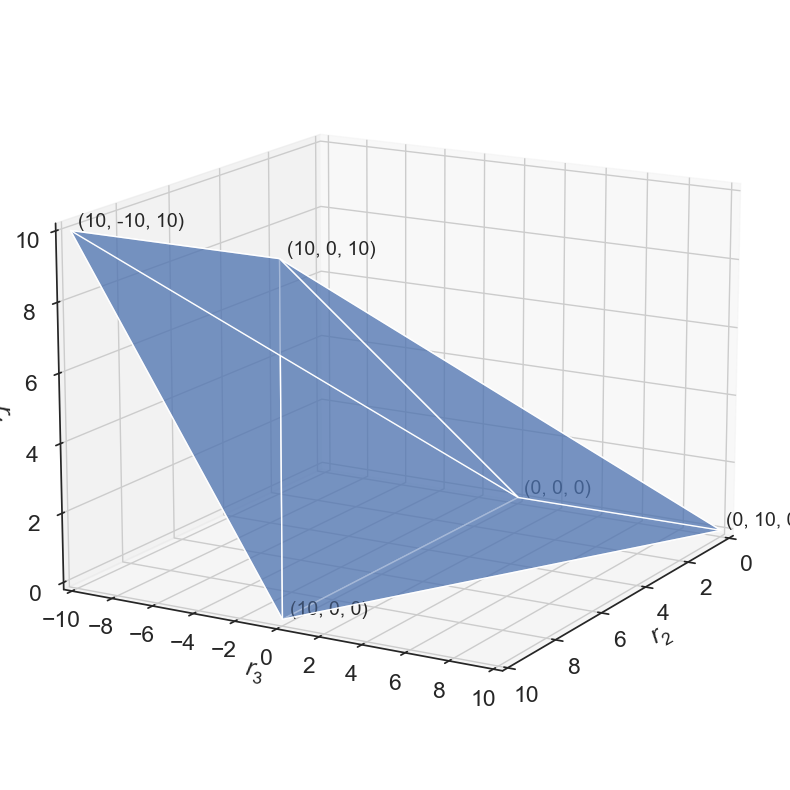

In [15]:
sns.set(style='ticks', font_scale=1.5)
f = plt.figure()
ax = f.add_subplot(projection='3d')

x = [0, 10, 10, 0, 10]
y = [0, 0, -10, 10, 0]
z = [0, 0, 10, 0, 10]
v = np.array(list(zip(x, y, z)))
hull = ConvexHull(v)

for s in hull.simplices:
    tri = Poly3DCollection([v[s]])
# #     tri.set_color(color)
    tri.set_alpha(0.5)
    ax.add_collection3d(tri)
    
for i, (x, y, z) in enumerate(v):
    ax.text(x - 0.3, y, z, '({}, {}, {})'.format(x, y, z, 0), ha='left', fontsize=14)
    
ax.set_xlabel('$r_2$')
ax.set_ylabel('$r_3$')
ax.set_zlabel('$r_4$')
ax.set_xlim(0, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(0, 10)
ax.set_yticks(range(-10, 11, 2))
ax.view_init(15, 30)

f.set_size_inches(10, 10)